In [13]:
#adicionar 

import numpy as np # linear algebra
from numpy import sort
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


import plotly.express as px
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel



In [171]:
import warnings
warnings.simplefilter("ignore", UserWarning)


#import the_module_that_warn

In [15]:
import requests
import io

In [16]:
import os

cwd = os.getcwd() 
files = os.listdir(cwd)
print("Files in %r: %s" % (cwd, files))

Files in 'C:\\Users\\19295\\AppData\\Local\\Programs\\Microsoft VS Code': ['bin', 'chrome_100_percent.pak', 'chrome_200_percent.pak', 'Code.exe', 'Code.VisualElementsManifest.xml', 'd3dcompiler_47.dll', 'ffmpeg.dll', 'icudtl.dat', 'libEGL.dll', 'libGLESv2.dll', 'locales', 'policies', 'resources', 'resources.pak', 'snapshot_blob.bin', 'tools', 'unins000.dat', 'unins000.exe', 'unins000.msg', 'v8_context_snapshot.bin', 'vk_swiftshader.dll', 'vk_swiftshader_icd.json', 'vulkan-1.dll']


In [17]:
url = 'https://raw.githubusercontent.com/catarinatomasr/projectoEDSB/main/HR_DS.csv'
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))
data = df
#df = pd.read_csv('https://github.com/catarinatomasr/projectoEDSB/blob/main/HR_DS.csv')

In [18]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [19]:
pd.set_option('display.max_columns', 40)
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [20]:
#data.replace(regex={'No':0,'Yes':1}, inplace=True)
#data

Definir perguntas para responder
Story 

Data Preparation/Clean

In [21]:
data.describe()
#Checking the Null Values
pd.set_option('display.max_rows', 200)
#data.isnull().sum() #no null values
#data.info()

#check for  duplicate records and have the unique records to be included into your dataset:
#data[data.duplicated()] #zero duplicated

In [22]:
#Over18 : ['Y']
#Y    1470
#so tem um unico valor, por isso vou apagar por ser inutil
#data['StandardHours'].unique() tambem so tem 1 valor, que é sempre 80
#data['EmployeeCount'].unique() tambem so tem 1 valor, que é 1

#não trazem valor 

data=data.drop('Over18', axis=1)
data=data.drop('StandardHours', axis=1)
data=data.drop('EmployeeCount', axis=1)

In [23]:
#ver os data types e ver os seus valores unicos

for column in data.columns:
    if data[column].dtype==object:
        print(str(column) + ' : ' + str(data[column].unique()))
        print(data[column].value_counts())
        print('_______________________________________________________________')


Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
_______________________________________________________________
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
_______________________________________________________________
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
_______________________________________________________________
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
_______________________________________________________________
Gender : ['Fema

In [24]:
#transformar as colunas que não sao numericas, em numericas pois os modelos n aceitam colunas texto
from sklearn.preprocessing import LabelEncoder

for column in data.columns:
    if data[column].dtype == np.int64:
            continue
    data[column]=LabelEncoder().fit_transform(data[column])

In [25]:
turnover_Summary = data.groupby('Attrition')
turnover_Summary.mean()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,37.561233,1.607461,812.504461,1.245742,8.915653,2.927007,2.231955,1027.656123,2.771290,0.593674,65.952149,2.770479,2.145985,4.386050,2.778589,1.045418,6832.739659,14265.779400,2.645580,0.234388,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
1,33.607595,1.607595,750.362869,1.337553,10.632911,2.839662,2.329114,1010.345992,2.464135,0.632911,65.573840,2.518987,1.637131,4.835443,2.468354,1.367089,4787.092827,14559.308017,2.940928,0.535865,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


# Analise descritiva dos dados-Gráficos


<AxesSubplot: xlabel='DistanceFromHome', ylabel='Count'>

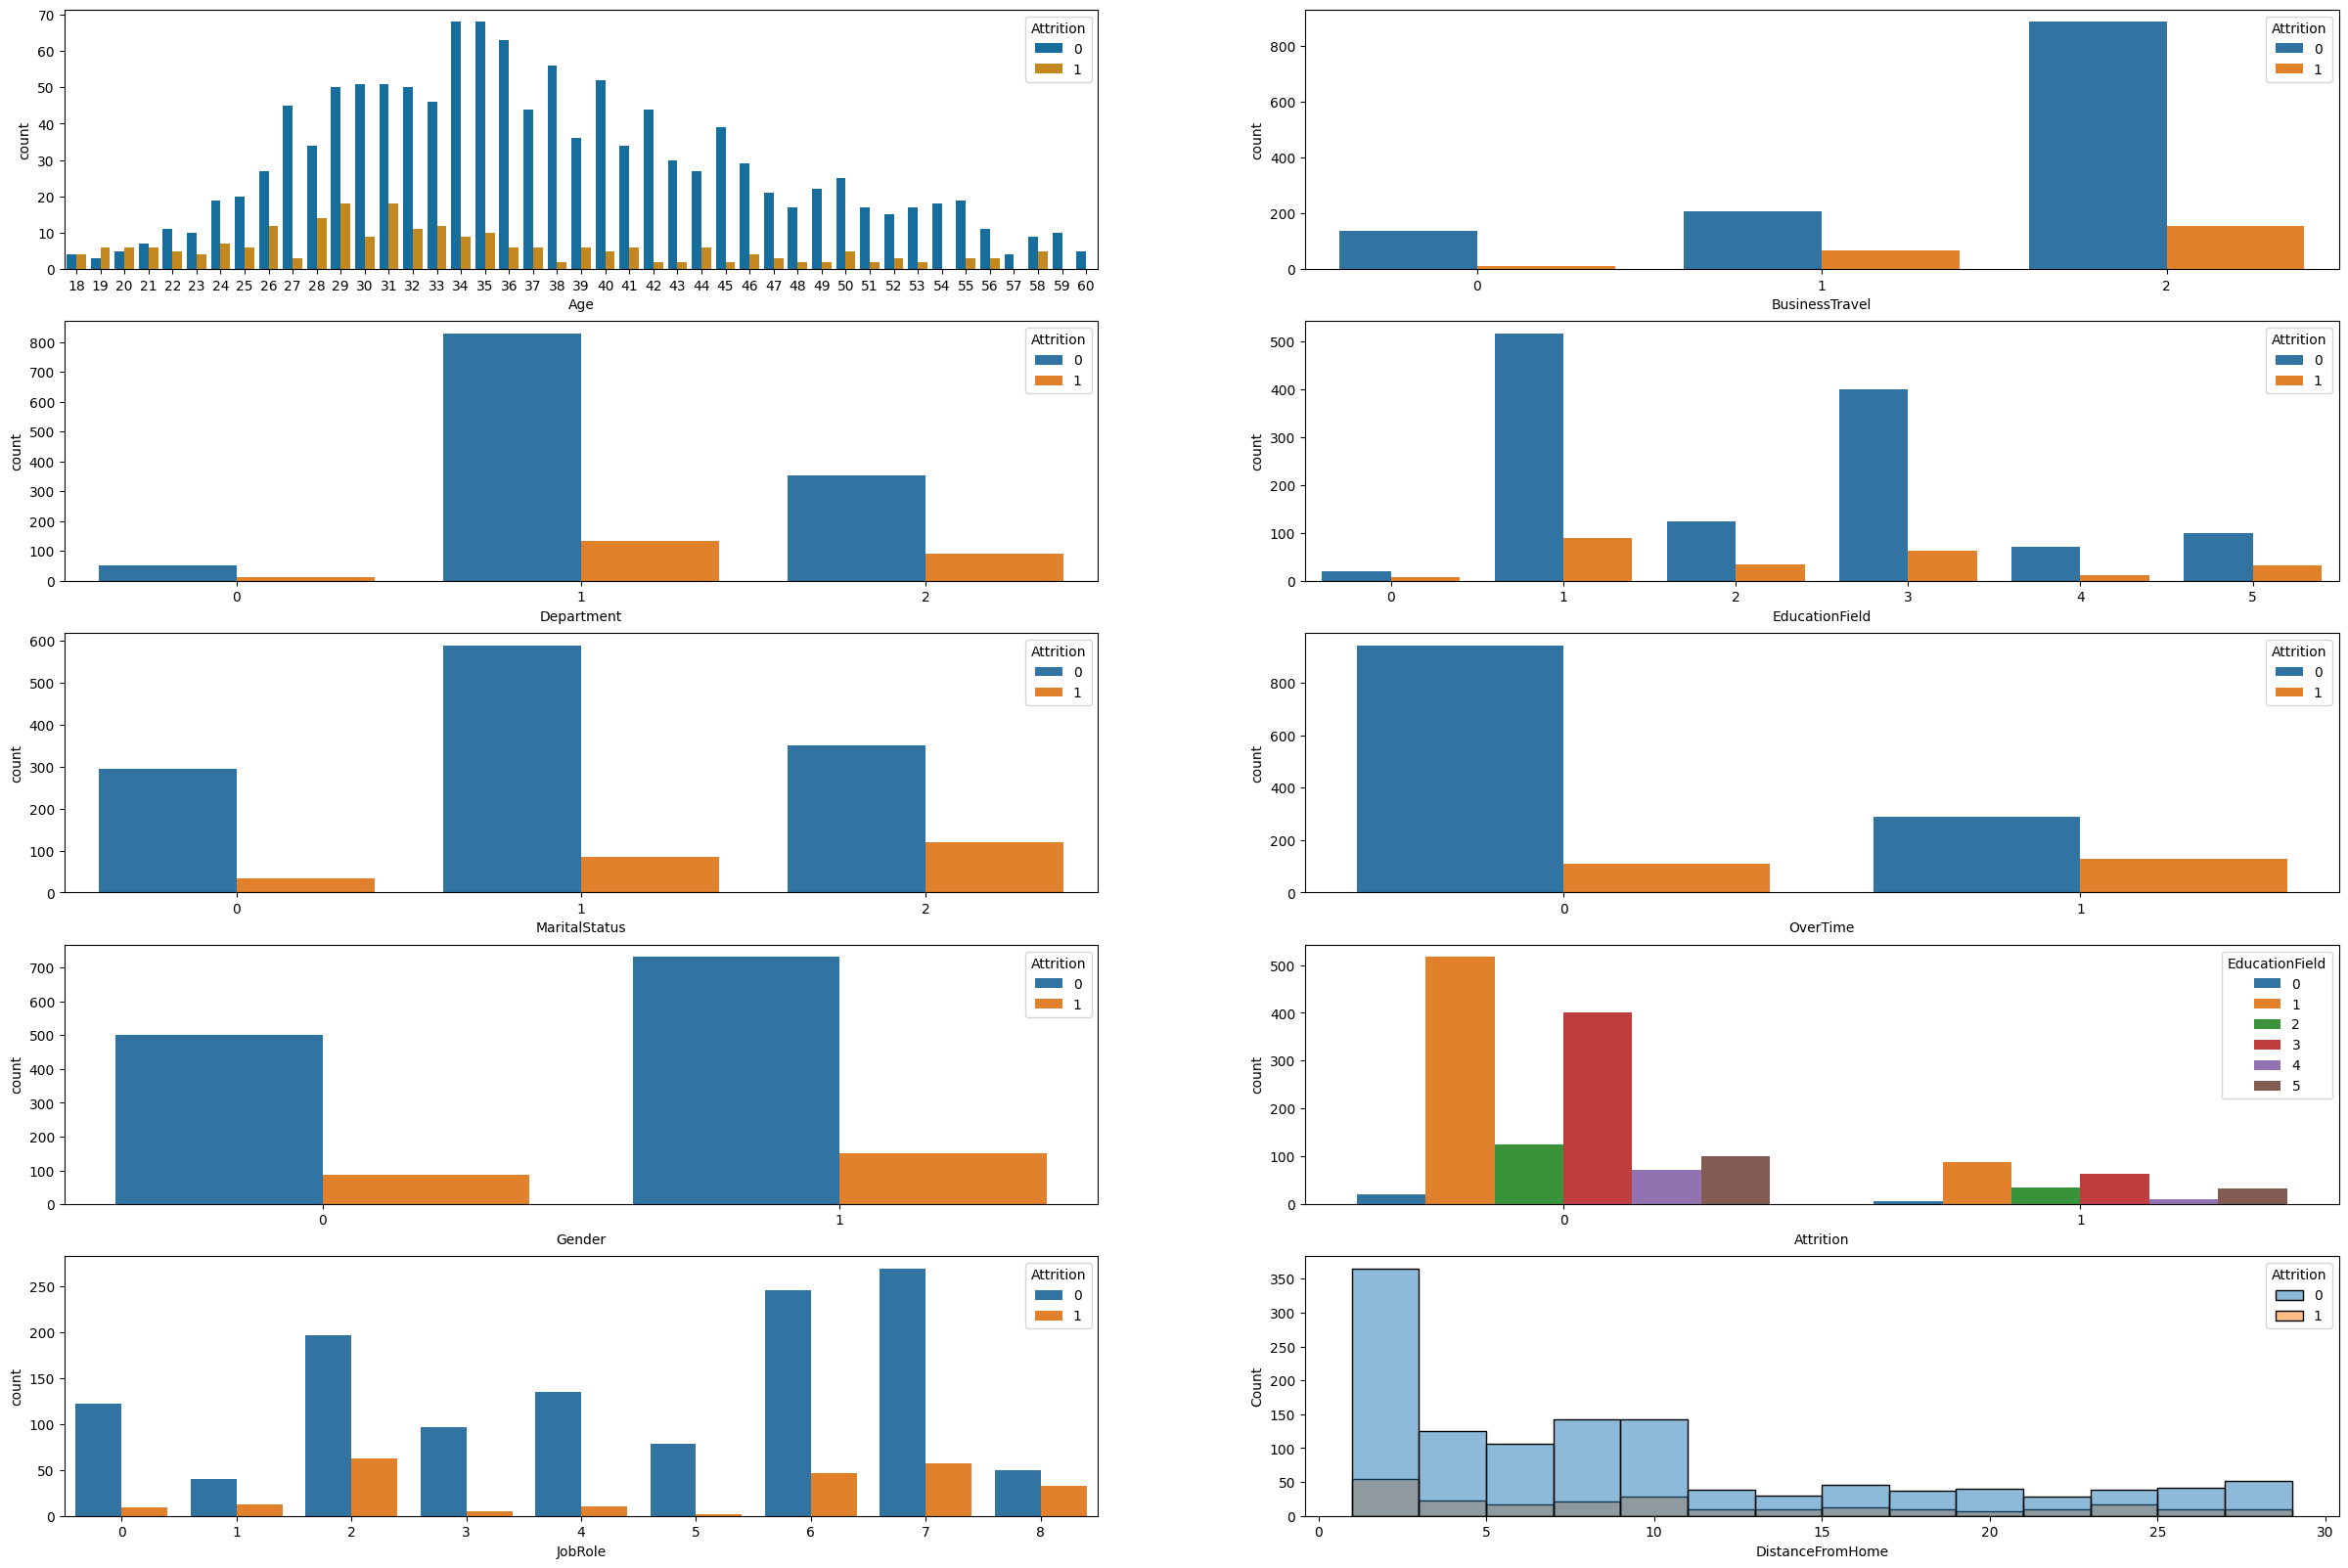

In [27]:
#Attrition em função das variaveis categoricas
fig, axes = plt.subplots(5,2, figsize = (30,20))
sns.countplot(ax = axes[0,0], data = data, x = 'Age', hue='Attrition',palette='colorblind')
sns.countplot(ax = axes[0,1],hue=data.Attrition, x=data.BusinessTravel)
sns.countplot(ax = axes[1,0],hue=data.Attrition, x=data.Department)
sns.countplot(ax = axes[1,1],hue=data.Attrition, x=data.EducationField)
sns.countplot(ax = axes[2,0],hue=data.Attrition, x=data.MaritalStatus)
sns.countplot(ax = axes[2,1],hue=data.Attrition, x=data.OverTime)
sns.countplot(ax = axes[3,0],hue=data.Attrition, x=data.Gender)
sns.countplot(ax = axes[3,1],x=data.Attrition, hue=data.EducationField)
sns.countplot(ax = axes[4,0],x='JobRole', hue='Attrition', data=data)
sns.histplot(ax = axes[4,1],hue=data.Attrition, x=data.DistanceFromHome)


In [28]:
def plot_distribution(var_select, bin_size) : 
# Calculate the correlation coefficient between the new variable and the target
    corr = data['Attrition'].corr(data[var_select])
    corr = np.round(corr,3)
    tmp1 = attrition[var_select]
    tmp2 = no_attrition[var_select]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['Yes_attrition', 'No_attrition']
    colors = ['#FFD700', '#7EC0EE']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, curve_type='kde', bin_size = bin_size)
    
    fig['layout'].update(title = var_select+' '+'(corr target ='+ str(corr)+')')

    py.iplot(fig, filename = 'Density plot')

In [29]:
def barplot(var_select, x_no_numeric) :
    tmp1 = data[(data['Attrition'] != 0)]
    tmp2 = data[(data['Attrition'] == 0)]
    tmp3 = pd.DataFrame(pd.crosstab(data[var_select],data['Attrition']), )
    tmp3['Attr%'] = tmp3[1] / (tmp3[1] + tmp3[0]) * 100
    if x_no_numeric == True  : 
        tmp3 = tmp3.sort_values(1, ascending = True)

    color=['green','orange' ]
    trace1 = go.Bar(
        x=tmp1[var_select].value_counts().keys().tolist(),
        y=tmp1[var_select].value_counts().values.tolist(),
        name='Yes_Attrition', marker=dict(
        color='orange',
        line=dict(color='#000000',width=2)))

    
    trace2 = go.Bar(
        x=tmp2[var_select].value_counts().keys().tolist(),
        y=tmp2[var_select].value_counts().values.tolist(),
        name='No_Attrition', opacity = 0.9, marker=dict(
        color='green',
        line=dict(color='#000000',width=2)))
    
    trace3 =  go.Scatter(   
        x=tmp3.index,
        y=tmp3['Attr%'],
        yaxis = 'y2',
        name='% Attrition', opacity = 0.9, marker=dict(
        color='darkblue',
        line=dict(color='#000000',width=0.5
        )))

    layout = dict(title =  str(var_select),
              #width=700,
              #height=400, 
              legend =dict(yanchor = "top", y=0.99, xanchor = 'right', x=0.99),
              xaxis=dict(), 
              yaxis=dict(title= 'Count'), 
              font = dict(size = 24),
              yaxis2=dict(range= [-0, 75], 
                          overlaying= 'y', 
                          anchor= 'x', 
                          side= 'right',
                          zeroline=False,
                          showgrid= False, 
                          title= '% Attrition'
                         ))
            

    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    py.iplot(fig)

In [30]:
def plot_pie(var_select) :
    
    colors = ['#B9C0C9', '#CED2FD', '#ceb0ff', 'lightskyblue', 'lightgrey', '#EAB9FC', 'cyan', '#DDC8FE']
    trace1 = go.Pie(values  = attrition[var_select].value_counts().values.tolist(),
                    labels  = attrition[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "attrition employes",
                    marker  = dict(colors = colors, line = dict(width = 1.5)))
    trace2 = go.Pie(values  = no_attrition[var_select].value_counts().values.tolist(),
                    labels  = no_attrition[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), 
                    hoverinfo = "label+percent+name",
                    marker  = dict(colors = colors, line = dict(width = 1.5)),
                    domain  = dict(x = [.52,1]),
                    name    = "Non attrition employes" )

    layout = go.Layout(dict(title = var_select + " distribution in employees attrition ",
                            annotations = [dict(text = "Yes_attrition",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .22, y = -0.1),
                                            dict(text = "No_attrition",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .8,y = -.1)]))
                                          

    fig  = go.Figure(data = [trace1,trace2],layout = layout)
    py.iplot(fig)

In [31]:
attrition = data[(data['Attrition'] != 0)]
no_attrition = data[(data['Attrition'] == 0)]

trace = go.Pie(labels = ['No_attrition', 'Yes_attrition'], values = data['Attrition'].value_counts(), 
               textfont=dict(size=15),
               marker=dict(colors=['#B9C0C9','yellow'], 
               line=dict(color='#000000', width=1.5)))
layout = dict(title =  'Distribution of attrition variable')          
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [32]:
barplot('Age', False)

In [33]:
barplot('DistanceFromHome', False)

In [34]:
barplot('Department', True)

In [35]:
barplot('EducationField', True)

In [36]:
plot_df=data.sort_values(by="Attrition")
fig=px.histogram(plot_df, x='MonthlyIncome', color='Attrition', 
                 opacity=0.8, histnorm='density', barmode='overlay', marginal='box',
                 color_discrete_map={'Yes': '#B9C0C9','No': '#CDBBA7'})
fig.update_layout(title_text='Distribution of Monthly Income by Attrition Status',
                  xaxis_title='Monthly Income, $', yaxis_title='Density',font_color='#28221D',
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0', legend_traceorder='reversed')
fig.show()

In [37]:
plot_df=data.sort_values(by="Attrition")
fig=px.histogram(plot_df, x='OverTime', color='Attrition', 
                 opacity=0.8, histnorm='density', barmode='overlay', marginal='box',
                 color_discrete_map={'Yes': '#B9C0C9','No': '#CDBBA7'})
fig.update_layout(title_text='Distribution of Over Time by Attrition Status',
                  xaxis_title='Over Time, ', yaxis_title='Density',font_color='#28221D',
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0', legend_traceorder='reversed')
fig.show()

In [38]:
df_attrition = data[data['Attrition'] == 1]
df_attrition

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
2,37,1,2,1373,1,2,2,4,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
14,28,1,2,103,1,24,3,1,19,3,1,50,2,1,2,3,2,2028,12947,5,1,14,3,2,0,6,4,3,4,2,0,3
21,36,1,2,1218,2,9,4,1,27,3,1,82,2,1,8,1,2,3407,6986,7,0,23,4,2,0,10,4,3,5,3,0,3
24,34,1,2,699,1,6,1,3,31,2,1,83,3,1,6,1,2,2960,17102,2,0,11,3,3,0,8,2,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,1,1,638,2,9,3,2,2023,4,1,33,3,1,8,1,1,1790,26956,1,0,19,3,1,1,1,3,2,1,0,1,0
1442,29,1,2,1092,1,1,4,3,2027,1,1,36,3,1,6,4,1,4787,26124,9,1,14,3,2,3,4,3,4,2,2,2,2
1444,56,1,2,310,1,7,2,5,2032,4,1,72,3,1,2,3,1,2339,3666,8,0,11,3,4,1,14,4,1,10,9,9,8
1452,50,1,1,878,2,1,4,1,2044,2,1,94,3,2,7,3,0,6728,14255,7,0,12,3,4,2,12,3,3,6,3,0,1


In [39]:
# cost calculation 
# best rate is around 10%. what is the cost of the 6% that left the company, on avg

((df_attrition['MonthlyRate'].sum())*3)*0.06/0.16

3881875.4999999995

## Statistical analysis

<AxesSubplot: >

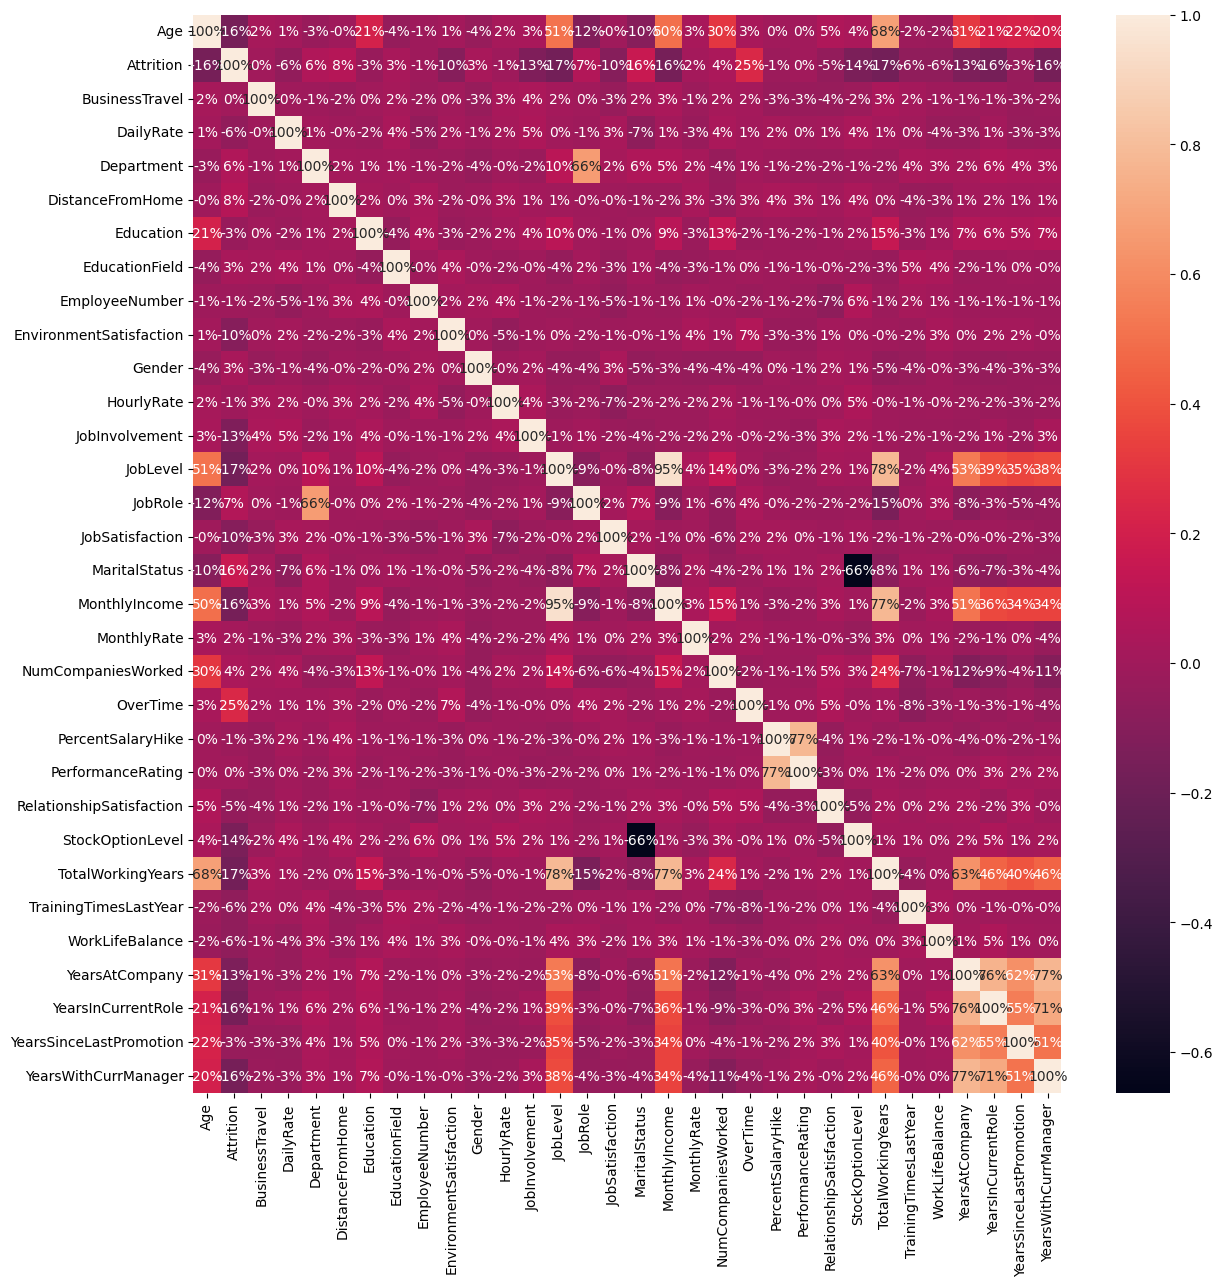

In [40]:
# ver a correlação dos dados
plt.figure(figsize=(14,14))
sns.heatmap(data.corr(), annot=True, fmt='0.0%')

# ML-Clustering/Unsupervising

#Kmeans

In [41]:
#Transform non-numeric columns into numerical columns
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])

C:\Users\19295\AppData\Local\Temp\ipykernel_10380\360305055.py:5: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.



In [42]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [43]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [44]:
data[['Age_T', 'Attrition_T', 'BusinessTravel_T', 'DailyRate_T', 'Department_T',
       'DistanceFromHome_T', 'Education_T', 'EducationField_T', 'EmployeeNumber_T',
       'EnvironmentSatisfaction_T', 'Gender_T', 'HourlyRate_T', 'JobInvolvement_T',
       'JobLevel_T', 'JobRole_T', 'JobSatisfaction_T', 'MaritalStatus_T',
       'MonthlyIncome_T', 'MonthlyRate_T', 'NumCompaniesWorked_T', 'OverTime_T',
       'PercentSalaryHike_T', 'PerformanceRating_T', 'RelationshipSatisfaction_T',
       'StockOptionLevel_T', 'TotalWorkingYears_T', 'TrainingTimesLastYear_T',
       'WorkLifeBalance_T', 'YearsAtCompany_T', 'YearsInCurrentRole_T',
       'YearsSinceLastPromotion_T', 'YearsWithCurrManager_T']]=scaler.fit_transform(data[['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']])

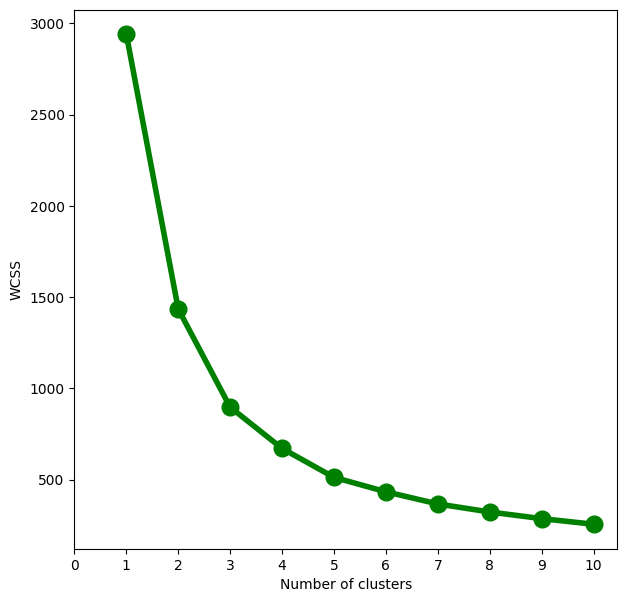

In [45]:
# find the optimal number of clusters using elbow method
from sklearn.cluster import KMeans
x = data.loc[:,['Age_T','MonthlyIncome_T']].values
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [46]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4)

In [47]:
kmeans.fit(data[['Age_T','MonthlyIncome_T']])

KMeans(n_clusters=4)

In [48]:
data['kmeans_4']=kmeans.labels_

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


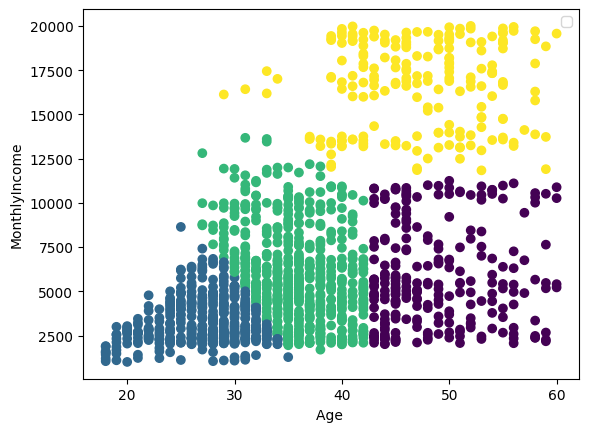

In [49]:
plt.scatter(x=data['Age'],y=data['MonthlyIncome'],c=data['kmeans_4'])
plt.xlabel("Age ")
plt.ylabel("MonthlyIncome")
plt.legend()
plt.show()

In [129]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4)

In [137]:
kmeans.fit(data[['TotalWorkingYears_T','Age_T','MonthlyIncome_T']])

KMeans(n_clusters=4)

In [138]:
data['kmeans_4.1']=kmeans.labels_

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


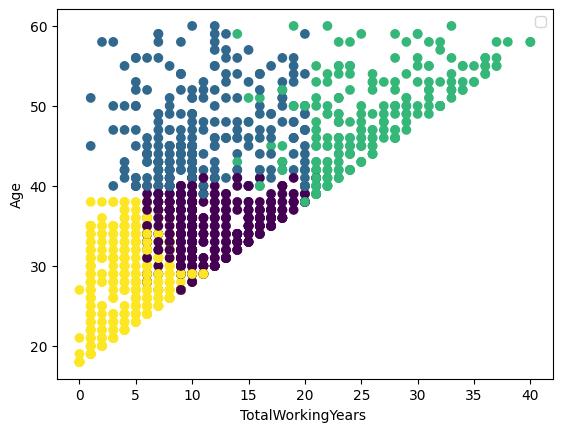

In [139]:
plt.scatter(x=data['TotalWorkingYears'],y=data['Age'],c=data['kmeans_4.1'])
plt.xlabel("TotalWorkingYears ")
plt.ylabel("Age")
plt.legend()
plt.show()

In [146]:
model = KMeans(n_clusters = 4, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(data_slice1)

In [155]:
data_slice1 = data[['Age','TotalWorkingYears','MonthlyIncome']].values
print(data_slice1[y_clusters == 0,0][1])
print(data_slice1[y_clusters == 0,1][1])
print(data_slice1[y_clusters == 0,2][1])

36
17
5237


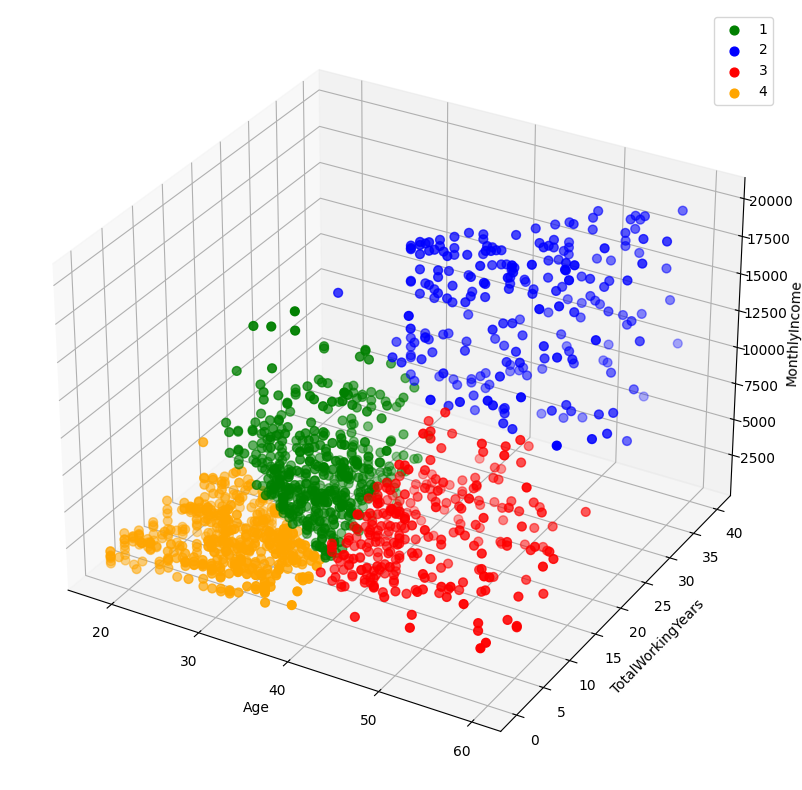

In [156]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
xs=data['Age']
ys=data['TotalWorkingYears']
zs=data['MonthlyIncome']
ax.scatter(data_slice1[y_clusters == 0,0],data_slice1[y_clusters == 0,1],data_slice1[y_clusters == 0,2], s = 40 , color = 'green', label = "1")
ax.scatter(data_slice1[y_clusters == 1,0],data_slice1[y_clusters == 1,1],data_slice1[y_clusters == 1,2], s = 40 , color = 'blue', label = "2")
ax.scatter(data_slice1[y_clusters == 2,0],data_slice1[y_clusters == 2,1],data_slice1[y_clusters == 2,2], s = 40 , color = 'red', label = "3")
ax.scatter(data_slice1[y_clusters == 3,0],data_slice1[y_clusters == 3,1],data_slice1[y_clusters == 3,2], s = 40 , color = 'orange', label = "4")
ax.set_xlabel("Age")
ax.set_ylabel("TotalWorkingYears")
ax.set_zlabel("MonthlyIncome")

ax.legend()
plt.show()

# ML-Modelo Preditivo



In [50]:
#pip install xgboost

In [51]:
#pip install catboost

In [52]:
#pip install evaluate

In [53]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)

from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score


# sklearn modules for preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from imblearn.over_sampling import SMOTE  # SMOTE
# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
# from sklearn.datasets import make_classification

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

In [54]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,0,0,1,0,64,2,1,7,3,2,809,999,8,0,1,0,0,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,0,1,2,1,31,1,1,6,1,1,682,1328,1,0,0,12,1,3,0,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,0,2,3,1,62,1,0,2,2,2,62,18,6,0,1,4,0,1,0,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,0,3,3,0,26,2,0,6,2,1,313,1228,1,0,1,0,0,2,0,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,4,0,1,10,2,0,2,1,1,399,846,9,0,0,1,0,3,0,1,6,3,2,2,2,2,2


In [55]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [56]:
df = df.drop(columns = ['EmployeeNumber','Over18','StandardHours'])

In [57]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,0,1,0,64,2,1,7,3,2,809,999,8,1,0,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,0,2,1,31,1,1,6,1,1,682,1328,1,0,12,1,3,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,0,3,1,62,1,0,2,2,2,62,18,6,1,4,0,1,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,0,3,0,26,2,0,6,2,1,313,1228,1,1,0,0,2,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,0,1,10,2,0,2,1,1,399,846,9,0,1,0,3,1,6,3,2,2,2,2,2


In [58]:
#Transform non-numeric columns into numerical columns
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])

df.head()

C:\Users\19295\AppData\Local\Temp\ipykernel_10380\4204384967.py:5: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,0,1,0,64,2,1,7,3,2,809,999,8,1,0,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,0,2,1,31,1,1,6,1,1,682,1328,1,0,12,1,3,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,0,3,1,62,1,0,2,2,2,62,18,6,1,4,0,1,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,0,3,0,26,2,0,6,2,1,313,1228,1,1,0,0,2,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,0,1,10,2,0,2,1,1,399,846,9,0,1,0,3,1,6,3,2,2,2,2,2


## Split de data

In [166]:
#Split the data into independent 'X' and dependent 'Y' variables
X = df.drop('Attrition', axis=1)
y = df.Attrition
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## Scale fit do DF para treino

In [113]:
scaler = MinMaxScaler(feature_range=(0, 5))
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test= pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_train.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.119048,5.0,1.962670,2.5,1.428571,1.25,1.0,0.0,3.333333,5.0,1.714286,3.333333,0.00,3.750,0.000000,5.0,0.753526,1.062412,0.555556,0.0,5.000000,5.0,3.333333,0.000000,0.128205,3.333333,3.333333,0.142857,0.294118,0.000000,0.000000
1,1.785714,5.0,4.179864,2.5,2.500000,0.00,3.0,0.0,1.666667,5.0,1.857143,3.333333,2.50,1.875,3.333333,2.5,4.432071,4.614306,3.888889,5.0,0.357143,0.0,5.000000,0.000000,1.923077,1.666667,5.000000,1.000000,1.764706,2.333333,2.058824
2,4.047619,5.0,4.355204,2.5,1.785714,3.75,1.0,0.0,5.000000,0.0,3.714286,3.333333,1.25,1.250,3.333333,2.5,1.314031,4.014727,4.444444,0.0,3.214286,5.0,1.666667,1.666667,1.153846,2.500000,3.333333,0.714286,0.588235,0.333333,1.176471
3,1.071429,2.5,1.759050,2.5,0.178571,2.50,3.0,0.0,5.000000,5.0,4.071429,3.333333,0.00,3.750,5.000000,5.0,0.794358,0.894109,1.111111,0.0,0.714286,0.0,3.333333,0.000000,0.769231,0.000000,1.666667,0.571429,0.588235,0.333333,0.588235
4,1.904762,2.5,0.718326,5.0,0.178571,3.75,2.0,0.0,3.333333,0.0,3.214286,3.333333,0.00,5.000,3.333333,2.5,0.374907,1.896914,3.333333,0.0,2.500000,0.0,5.000000,1.666667,0.769231,2.500000,3.333333,0.571429,0.882353,0.333333,0.588235


In [114]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    #print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE: {accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("\n TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    #print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE: {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

## Logistic Regression

In [115]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(X_train, y_train)

evaluate(lr_clf, X_train, X_test, y_train, y_test)



TRAINIG RESULTS: 
ACCURACY SCORE: 0.8844
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.898287    0.747368  0.884354     0.822828      0.873941
recall       0.972190    0.427711  0.884354     0.699950      0.884354
f1-score     0.933779    0.544061  0.884354     0.738920      0.870909
support    863.000000  166.000000  0.884354  1029.000000   1029.000000

 TESTING RESULTS: 
ACCURACY SCORE: 0.8662
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.878345   0.700000  0.866213    0.789173      0.849632
recall       0.975676   0.295775  0.866213    0.635725      0.866213
f1-score     0.924456   0.415842  0.866213    0.670149      0.842570
support    370.000000  71.000000  0.866213  441.000000    441.000000


## Random Forest

In [116]:
rf_clf = RandomForestClassifier(n_estimators=50, bootstrap=False)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
ACCURACY SCORE: 1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    863.0  166.0       1.0     1029.0        1029.0

 TESTING RESULTS: 
ACCURACY SCORE: 0.8481
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.861575   0.590909  0.848073    0.726242      0.817999
recall       0.975676   0.183099  0.848073    0.579387      0.848073
f1-score     0.915082   0.279570  0.848073    0.597326      0.812766
support    370.000000  71.000000  0.848073  441.000000    441.000000


## SVM

In [117]:
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)

evaluate(svm_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
ACCURACY SCORE: 0.8814
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.887958    0.797297  0.881438     0.842628      0.873333
recall       0.982619    0.355422  0.881438     0.669020      0.881438
f1-score     0.932893    0.491667  0.881438     0.712280      0.861714
support    863.000000  166.000000  0.881438  1029.000000   1029.000000

 TESTING RESULTS: 
ACCURACY SCORE: 0.8753
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.885086   0.750000  0.875283    0.817543      0.863337
recall       0.978378   0.338028  0.875283    0.658203      0.875283
f1-score     0.929397   0.466019  0.875283    0.697708      0.854794
support    370.000000  71.000000  0.875283  441.000000    441.000000


## XGBoost

In [118]:
xgb_clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                           colsample_bytree=0.8, gamma=1.5, learning_rate=0.05,
                           max_delta_step=0, max_depth=5, min_child_weight=7,
                           n_estimators=200, n_jobs=-1, nthread=None,
                           objective='binary:logistic', random_state=0, reg_alpha=0,
                           reg_lambda=1, scale_pos_weight=1, seed=None,
                           subsample=0.6)
xgb_clf.fit(X_train, y_train)

evaluate(xgb_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
ACCURACY SCORE: 0.9349
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.930736    0.971429  0.934888     0.951082      0.937301
recall       0.996524    0.614458  0.934888     0.805491      0.934888
f1-score     0.962507    0.752768  0.934888     0.857637      0.928671
support    863.000000  166.000000  0.934888  1029.000000   1029.000000

 TESTING RESULTS: 
ACCURACY SCORE: 0.8526
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.871046   0.600000  0.852608    0.735523      0.827408
recall       0.967568   0.253521  0.852608    0.610544      0.852608
f1-score     0.916773   0.356436  0.852608    0.636605      0.826560
support    370.000000  71.000000  0.852608  441.000000    441.000000


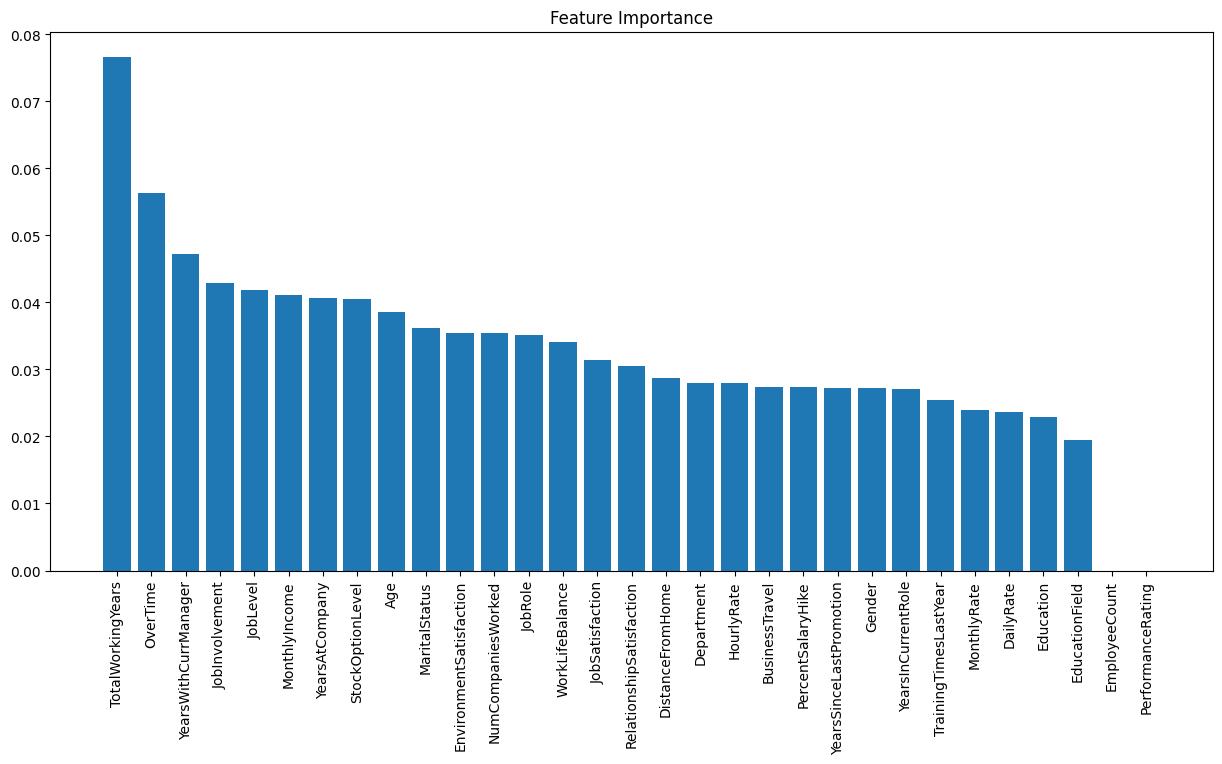

In [119]:
importances = xgb_clf.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

In [121]:
importances = xgb_clf.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(31):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

,Feature,Coefficient
0,TotalWorkingYears,0.076574
1,OverTime,0.056272
2,YearsWithCurrManager,0.047262
3,JobInvolvement,0.042905
4,JobLevel,0.041803
5,MonthlyIncome,0.041126
6,YearsAtCompany,0.040665
7,StockOptionLevel,0.040436
8,Age,0.038600
9,MaritalStatus,0.036211


In [172]:

model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data and evaluate
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(model, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train)
	# train model
	selection_model = XGBClassifier()
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(X_test)
	y_pred = selection_model.predict(select_X_test)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(y_test, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Accuracy: 84.58%
Thresh=0.000, n=31, Accuracy: 84.58%
Thresh=0.000, n=31, Accuracy: 84.58%
Thresh=0.012, n=29, Accuracy: 84.58%
Thresh=0.013, n=28, Accuracy: 85.03%
Thresh=0.017, n=27, Accuracy: 85.03%
Thresh=0.019, n=26, Accuracy: 85.03%
Thresh=0.020, n=25, Accuracy: 84.35%
Thresh=0.021, n=24, Accuracy: 84.35%
Thresh=0.026, n=23, Accuracy: 84.81%
Thresh=0.027, n=22, Accuracy: 84.13%
Thresh=0.028, n=21, Accuracy: 85.49%
Thresh=0.028, n=20, Accuracy: 85.49%
Thresh=0.030, n=19, Accuracy: 85.71%
Thresh=0.030, n=18, Accuracy: 85.03%
Thresh=0.030, n=17, Accuracy: 84.81%
Thresh=0.031, n=16, Accuracy: 85.71%
Thresh=0.032, n=15, Accuracy: 85.94%
Thresh=0.033, n=14, Accuracy: 85.71%
Thresh=0.033, n=13, Accuracy: 84.58%
Thresh=0.034, n=12, Accuracy: 85.26%
Thresh=0.035, n=11, Accuracy: 83.22%
Thresh=0.035, n=10, Accuracy: 82.99%
Thresh=0.036, n=9, Accuracy: 81.63%
Thresh=0.038, n=8, Accuracy: 81.18%
Thresh=0.040, n=7, Accuracy: 82.31%
Thresh=0.044, n=6, Accuracy: 82.77%
Thresh=0.045, n=5, Accura

## CatBoost

In [122]:
cb_clf = CatBoostClassifier()
cb_clf.fit(X_train, y_train, verbose=0)

evaluate(cb_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
ACCURACY SCORE: 0.9874
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.985160    1.000000  0.987366     0.992580      0.987554
recall       1.000000    0.921687  0.987366     0.960843      0.987366
f1-score     0.992524    0.959248  0.987366     0.975886      0.987156
support    863.000000  166.000000  0.987366  1029.000000   1029.000000

 TESTING RESULTS: 
ACCURACY SCORE: 0.8549
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.864286   0.666667  0.854875    0.765476      0.832469
recall       0.981081   0.197183  0.854875    0.589132      0.854875
f1-score     0.918987   0.304348  0.854875    0.611668      0.820032
support    370.000000  71.000000  0.854875  441.000000    441.000000


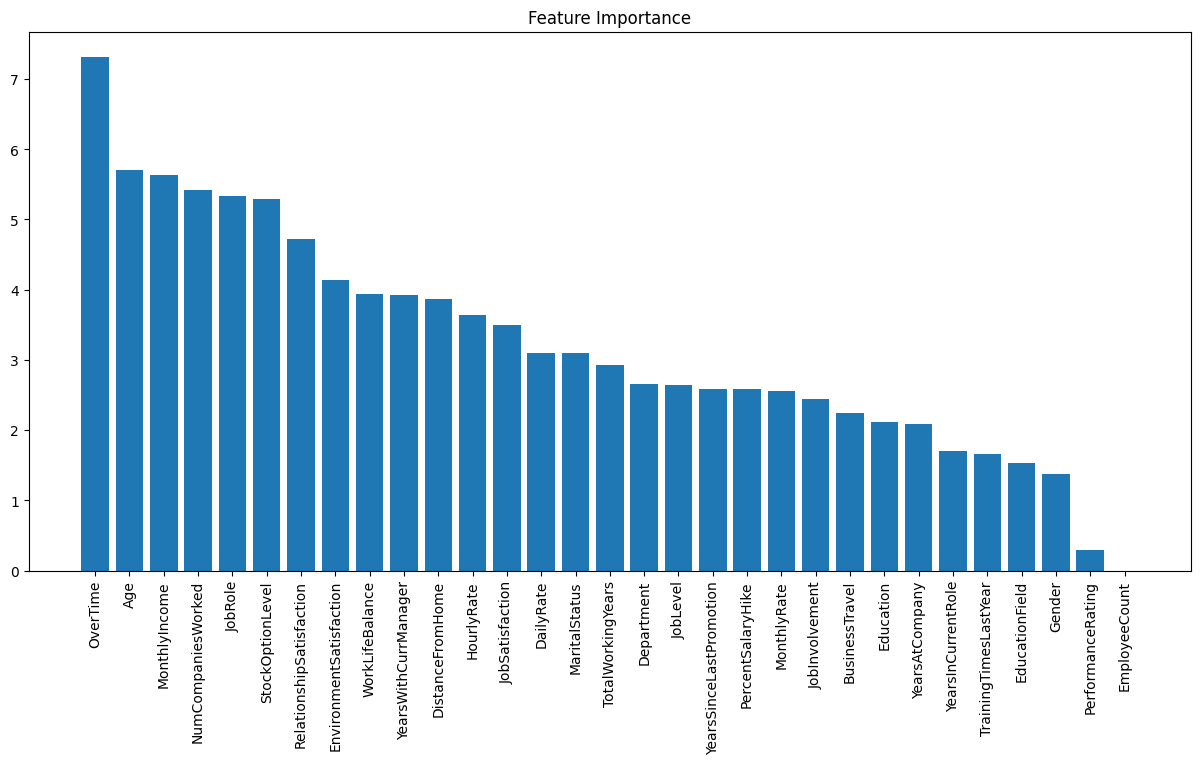

In [123]:
importances = cb_clf.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

In [124]:
importances = cb_clf.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(31):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

,Feature,Coefficient
0,OverTime,7.311249
1,Age,5.707244
2,MonthlyIncome,5.633741
3,NumCompaniesWorked,5.415971
4,JobRole,5.329642
5,StockOptionLevel,5.292935
6,RelationshipSatisfaction,4.718091
7,EnvironmentSatisfaction,4.140943
8,WorkLifeBalance,3.943869
9,YearsWithCurrManager,3.925493


# Teste com outros modelos supervisionados

In [69]:
# selection of algorithms to consider and set performance measure
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7,
                                                         class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))

In [70]:

acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=7, shuffle = True)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
1,Random Forest,81.31,7.33,86.78,3.91
0,Logistic Regression,80.59,8.83,74.14,5.21
2,SVM,80.17,7.04,85.52,4.21
5,Gaussian NB,75.87,6.66,78.23,5.51
3,KNN,67.64,5.86,85.04,2.77
4,Decision Tree Classifier,62.65,5.70,80.66,3.58


Classification Accuracy is the number of correct predictions made as a ratio of all predictions made.
It is the most common evaluation metric for classification problems. However, it is often misused as it is only really suitable when there are an equal number of observations in each class and all predictions and prediction errors are equally important. It is not the case in this project, so a different scoring metric may be more suitable.

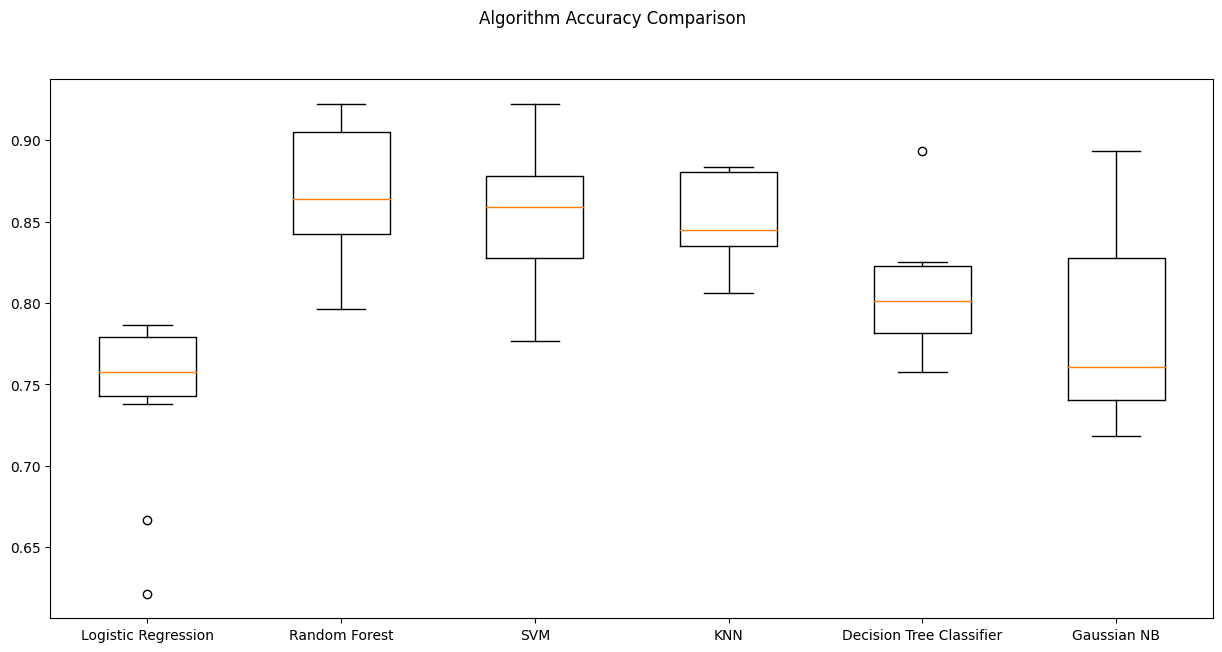

In [71]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.show()

Area under ROC Curve (or AUC for short) is a performance metric for binary classification problems.
The AUC represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random.

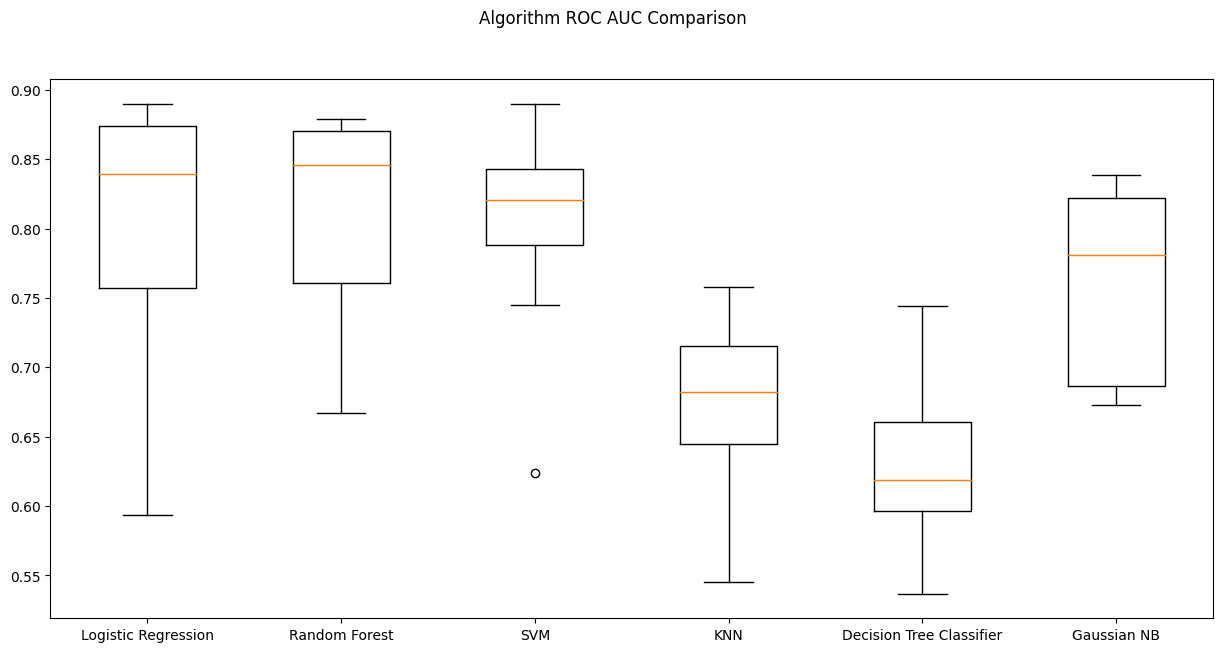

In [72]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm ROC AUC Comparison')
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
plt.show()

In [73]:
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
modelCV = LogisticRegression(solver='liblinear',
                             class_weight="balanced", 
                             random_state=7)
scoring = 'roc_auc'
results = model_selection.cross_val_score(
    modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC score (STD): %.2f (%.2f)" % (results.mean(), results.std()))

AUC score (STD): 0.81 (0.09)


GridSearchCV allows use to fine-tune hyper-parameters by searching over specified parameter values for an estimator.

In [74]:
param_grid = {'C': np.arange(1e-03, 2, 0.01)} # hyper-parameter list to fine-tune
log_gs = GridSearchCV(LogisticRegression(solver='liblinear', # setting GridSearchCV
                                         class_weight="balanced", 
                                         random_state=7),
                      
                      return_train_score=True,
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=10)

log_grid = log_gs.fit(X_train, y_train)
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_

print('='*20)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)
print('='*20)

best params: LogisticRegression(C=1.8509999999999995, class_weight='balanced',
                   random_state=7, solver='liblinear')
best params: {'C': 1.8509999999999995}
best score: 0.8153903191188263


Text(0.5, 427.9555555555555, 'Predicted label')

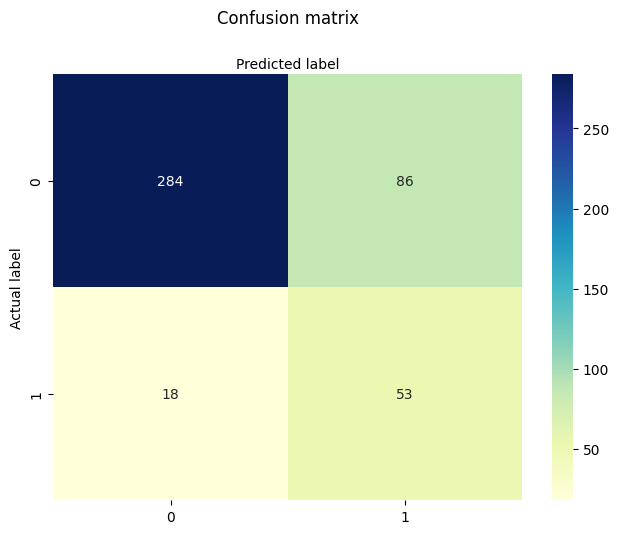

In [75]:

## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, log_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [76]:
print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'.format(log_opt.score(X_test, y_test)*100))

Accuracy of Logistic Regression Classifier on test set: 76.42


In [77]:
# Classification report for the optimised Log Regression
log_opt.fit(X_train, y_train)
print(classification_report(y_test, log_opt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.77      0.85       370
           1       0.38      0.75      0.50        71

    accuracy                           0.76       441
   macro avg       0.66      0.76      0.68       441
weighted avg       0.85      0.76      0.79       441



In [78]:
log_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = log_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
logit_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % logit_roc_auc)

AUC score: 0.808


Instead of getting binary estimated target features (0 or 1), a probability can be associated with the predicted target.
The output provides a first index referring to the probability that the data belong to class 0 (employee not leaving), and the second refers to the probability that the data belong to class 1 (employee leaving).

The resulting AUC score is: 0.808 which is higher than that best score during the optimisation step.

### Random Forest Classifier

In [79]:
## Fine tuning
rf_classifier = RandomForestClassifier(class_weight = "balanced",
                                       random_state=7)
param_grid = {'n_estimators': [50, 75, 100, 125, 150, 175],
              'min_samples_split':[2,4,6,8,10],
              'min_samples_leaf': [1, 2, 3, 4],
              'max_depth': [5, 10, 15, 20, 25]}

grid_obj = GridSearchCV(rf_classifier,
                        
                        return_train_score=True,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        cv=10)

grid_fit = grid_obj.fit(X_train, y_train)
rf_opt = grid_fit.best_estimator_

print('='*20)
print("best params: " + str(grid_obj.best_estimator_))
print("best params: " + str(grid_obj.best_params_))
print('best score:', grid_obj.best_score_)
print('='*20)

best params: RandomForestClassifier(class_weight='balanced', max_depth=15,
                       min_samples_leaf=2, n_estimators=125, random_state=7)
best params: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 125}
best score: 0.8145512956586003


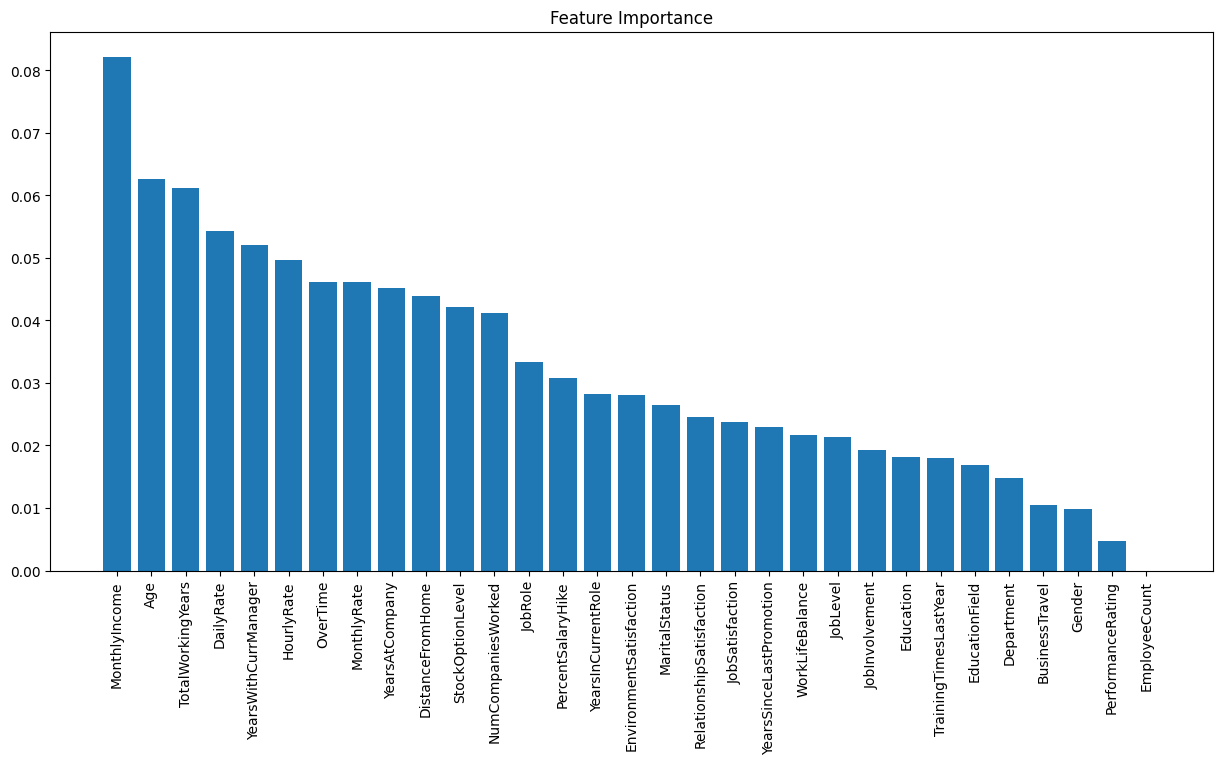

In [80]:
importances = rf_opt.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

In [81]:
importances = rf_opt.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(31):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

,Feature,Coefficient
0,MonthlyIncome,0.082080
1,Age,0.062543
2,TotalWorkingYears,0.061214
3,DailyRate,0.054256
4,YearsWithCurrManager,0.052122
5,HourlyRate,0.049728
6,OverTime,0.046160
7,MonthlyRate,0.046105
8,YearsAtCompany,0.045160
9,DistanceFromHome,0.043973


Text(0.5, 427.9555555555555, 'Predicted label')

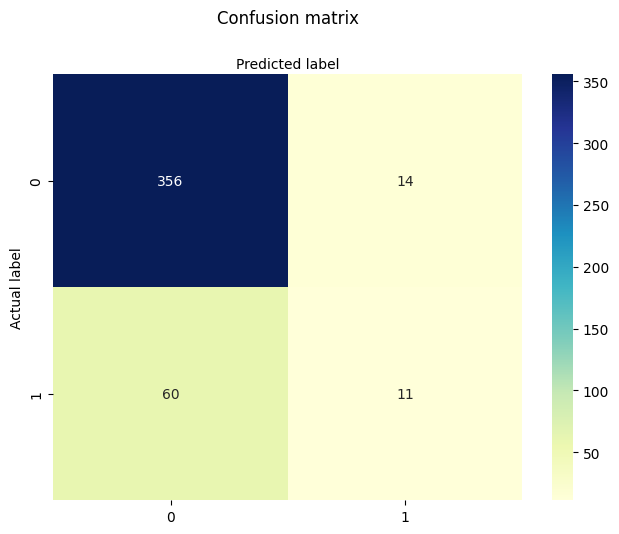

In [82]:

## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, rf_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [83]:

print('Accuracy of RandomForest Regression Classifier on test set: {:.2f}'.format(rf_opt.score(X_test, y_test)*100))

Accuracy of RandomForest Regression Classifier on test set: 83.22


In [84]:
# Classification report for the optimised RF Regression
rf_opt.fit(X_train, y_train)
print(classification_report(y_test, rf_opt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       370
           1       0.44      0.15      0.23        71

    accuracy                           0.83       441
   macro avg       0.65      0.56      0.57       441
weighted avg       0.79      0.83      0.80       441



In [85]:
rf_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = rf_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
rf_opt_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % rf_opt_roc_auc)

AUC score: 0.762


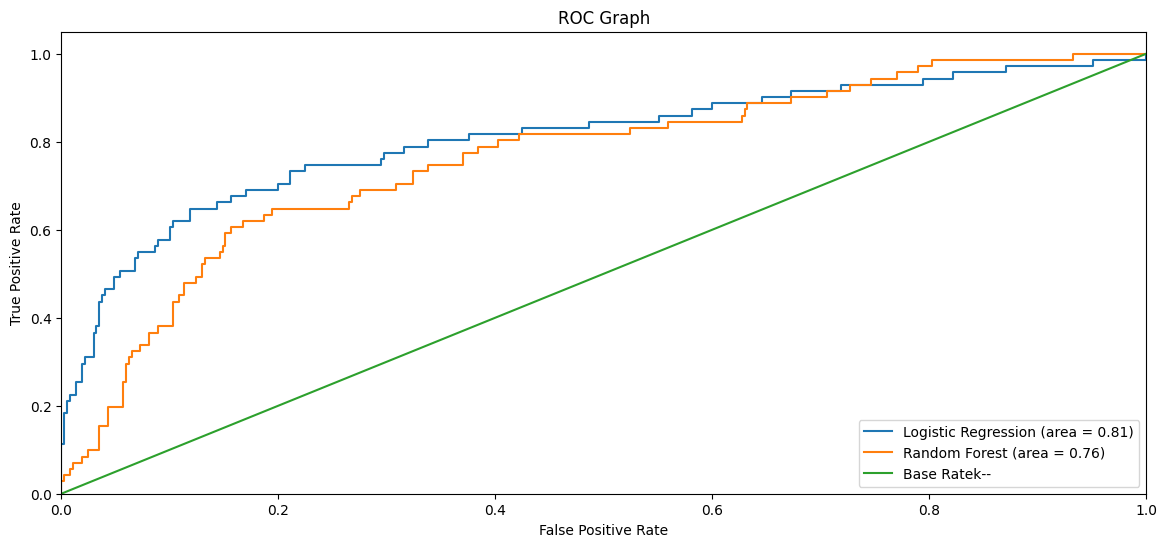

In [86]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, log_opt.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_opt.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_opt_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

## ML apenas  com as features importantes

In [91]:
data2 = data[['Attrition','MonthlyIncome', 'Age', 'TotalWorkingYears', 'DailyRate', 'YearsWithCurrManager',
        'HourlyRate', 'OverTime', 'MonthlyRate', 'YearsAtCompany', 'DistanceFromHome']]

data2.head(5)

,Attrition,MonthlyIncome,Age,TotalWorkingYears,DailyRate,YearsWithCurrManager,HourlyRate,OverTime,MonthlyRate,YearsAtCompany,DistanceFromHome
0,1,5993,41,8,1102,5,94,1,19479,6,1
1,0,5130,49,10,279,7,61,0,24907,10,8
2,1,2090,37,7,1373,0,92,1,2396,0,2
3,0,2909,33,8,1392,0,56,1,23159,8,3
4,0,3468,27,6,591,2,40,0,16632,2,2


## Split de data

In [93]:
#Split the data into independent 'X' and dependent 'Y' variables
X = data2.drop('Attrition', axis=1)
y = data2.Attrition
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## Scale fit do DF para treino

In [94]:
scaler = MinMaxScaler(feature_range=(0, 5))
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test= pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_train.head()

,MonthlyIncome,Age,TotalWorkingYears,DailyRate,YearsWithCurrManager,HourlyRate,OverTime,MonthlyRate,YearsAtCompany,DistanceFromHome
0,0.406823,0.119048,0.125,1.941261,0.000000,1.714286,0.0,1.019474,0.135135,1.428571
1,3.322348,1.785714,1.875,4.204871,2.058824,1.857143,5.0,4.522184,0.945946,2.500000
2,0.564227,4.047619,1.125,4.376791,1.176471,3.714286,0.0,3.960450,0.675676,1.785714
3,0.414206,1.071429,0.750,1.747851,0.588235,4.071429,0.0,0.843806,0.540541,0.178571
4,0.322189,1.904762,0.750,0.716332,0.588235,3.214286,0.0,1.851034,0.540541,0.178571


In [95]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    #print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE: {accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("\n TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    #print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE: {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

## Logistic Regression

In [101]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(X_train, y_train)

evaluate(lr_clf, X_train, X_test, y_train, y_test)



TRAINIG RESULTS: 
ACCURACY SCORE: 0.8581
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.860302    0.794118  0.858115     0.82721      0.849625
recall       0.991889    0.162651  0.858115     0.57727      0.858115
f1-score     0.921421    0.270000  0.858115     0.59571      0.816333
support    863.000000  166.000000  0.858115  1029.00000   1029.000000

 TESTING RESULTS: 
ACCURACY SCORE: 0.8481
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.856471   0.625000  0.848073    0.740735      0.819204
recall       0.983784   0.140845  0.848073    0.562314      0.848073
f1-score     0.915723   0.229885  0.848073    0.572804      0.805305
support    370.000000  71.000000  0.848073  441.000000    441.000000


## Random Forest

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=50, bootstrap=False)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
ACCURACY SCORE: 1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    863.0  166.0       1.0     1029.0        1029.0

 TESTING RESULTS: 
ACCURACY SCORE: 0.8231
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.859606   0.400000  0.823129    0.629803      0.785610
recall       0.943243   0.197183  0.823129    0.570213      0.823129
f1-score     0.899485   0.264151  0.823129    0.581818      0.797197
support    370.000000  71.000000  0.823129  441.000000    441.000000


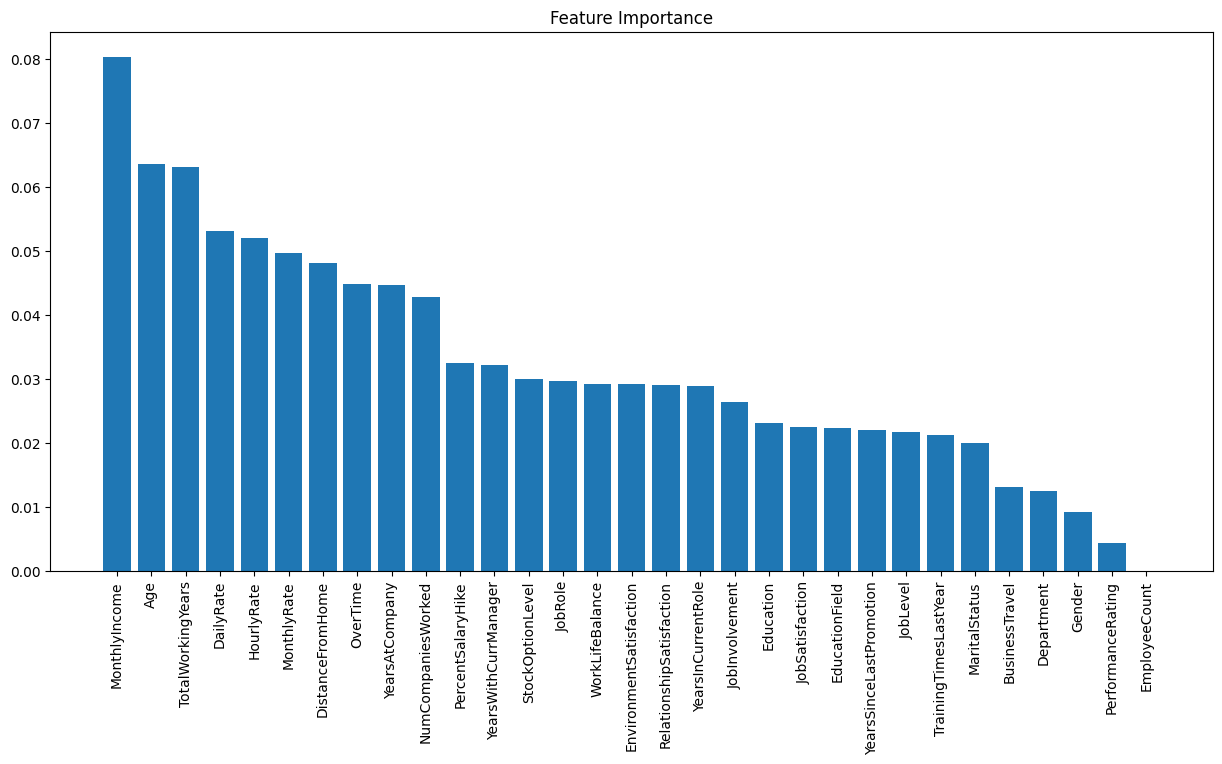

In [127]:
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

In [128]:
importances = rf_clf.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(31):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

,Feature,Coefficient
0,MonthlyIncome,0.080262
1,Age,0.063639
2,TotalWorkingYears,0.063139
3,DailyRate,0.053027
4,HourlyRate,0.051969
5,MonthlyRate,0.049710
6,DistanceFromHome,0.048058
7,OverTime,0.044815
8,YearsAtCompany,0.044612
9,NumCompaniesWorked,0.042782


## XGBoost

In [ ]:
xgb_clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                           colsample_bytree=0.8, gamma=1.5, learning_rate=0.05,
                           max_delta_step=0, max_depth=5, min_child_weight=7,
                           n_estimators=200, n_jobs=-1, nthread=None,
                           objective='binary:logistic', random_state=0, reg_alpha=0,
                           reg_lambda=1, scale_pos_weight=1, seed=None,
                           subsample=0.6)
xgb_clf.fit(X_train, y_train)

evaluate(xgb_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
ACCURACY SCORE: 0.8960
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.897059    0.883117  0.896016     0.890088      0.894810
recall       0.989571    0.409639  0.896016     0.699605      0.896016
f1-score     0.941047    0.559671  0.896016     0.750359      0.879523
support    863.000000  166.000000  0.896016  1029.000000   1029.000000

 TESTING RESULTS: 
ACCURACY SCORE: 0.8231
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.857843   0.393939  0.823129    0.625891      0.783156
recall       0.945946   0.183099  0.823129    0.564522      0.823129
f1-score     0.899743   0.250000  0.823129    0.574871      0.795136
support    370.000000  71.000000  0.823129  441.000000    441.000000


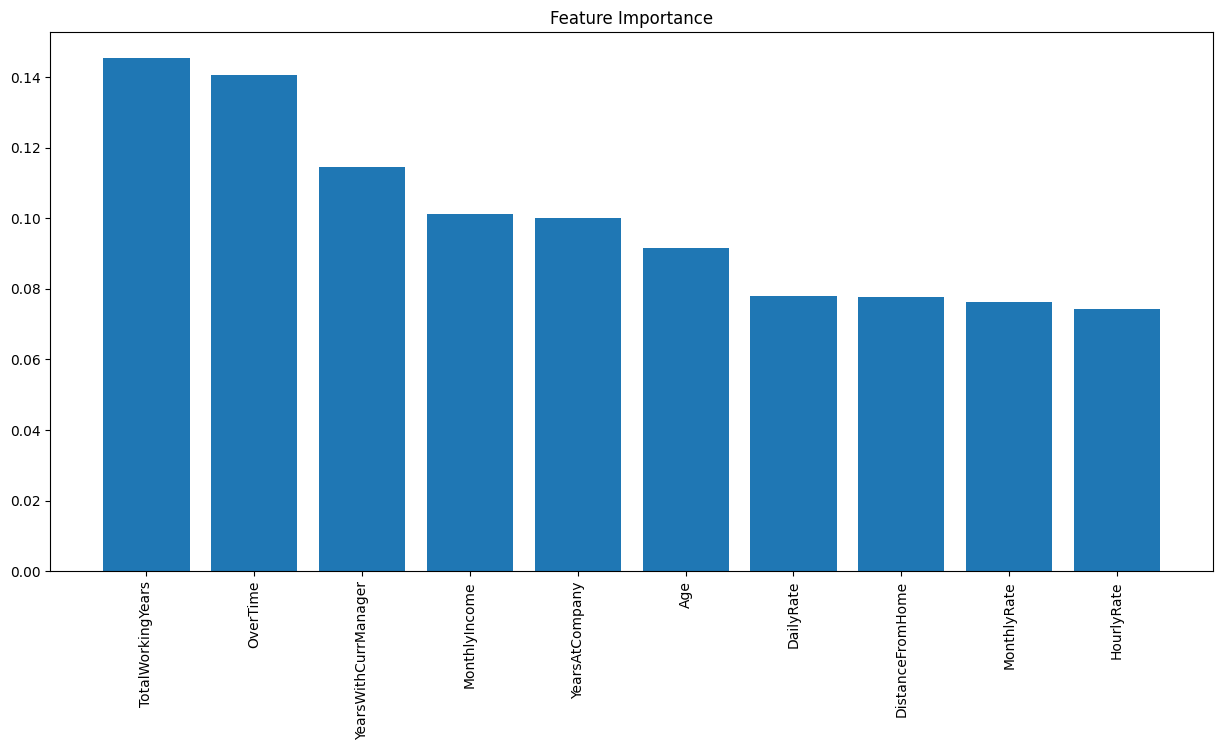

In [ ]:
importances = xgb_clf.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

In [ ]:
importances = xgb_clf.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(10):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

,Feature,Coefficient
0,TotalWorkingYears,0.145387
1,OverTime,0.140533
2,YearsWithCurrManager,0.114564
3,MonthlyIncome,0.101184
4,YearsAtCompany,0.100052
5,Age,0.091660
6,DailyRate,0.078016
7,DistanceFromHome,0.077808
8,MonthlyRate,0.076398
9,HourlyRate,0.074399


## CatBoost

In [ ]:
cb_clf = CatBoostClassifier()
cb_clf.fit(X_train, y_train, verbose=0)

evaluate(cb_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
ACCURACY SCORE: 0.9504
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.944201    1.000000  0.950437     0.972101      0.953203
recall       1.000000    0.692771  0.950437     0.846386      0.950437
f1-score     0.971300    0.818505  0.950437     0.894903      0.946651
support    863.000000  166.000000  0.950437  1029.000000   1029.000000

 TESTING RESULTS: 
ACCURACY SCORE: 0.8322
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.860976   0.451613    0.8322    0.656294      0.795069
recall       0.954054   0.197183    0.8322    0.575619      0.832200
f1-score     0.905128   0.274510    0.8322    0.589819      0.803600
support    370.000000  71.000000    0.8322  441.000000    441.000000


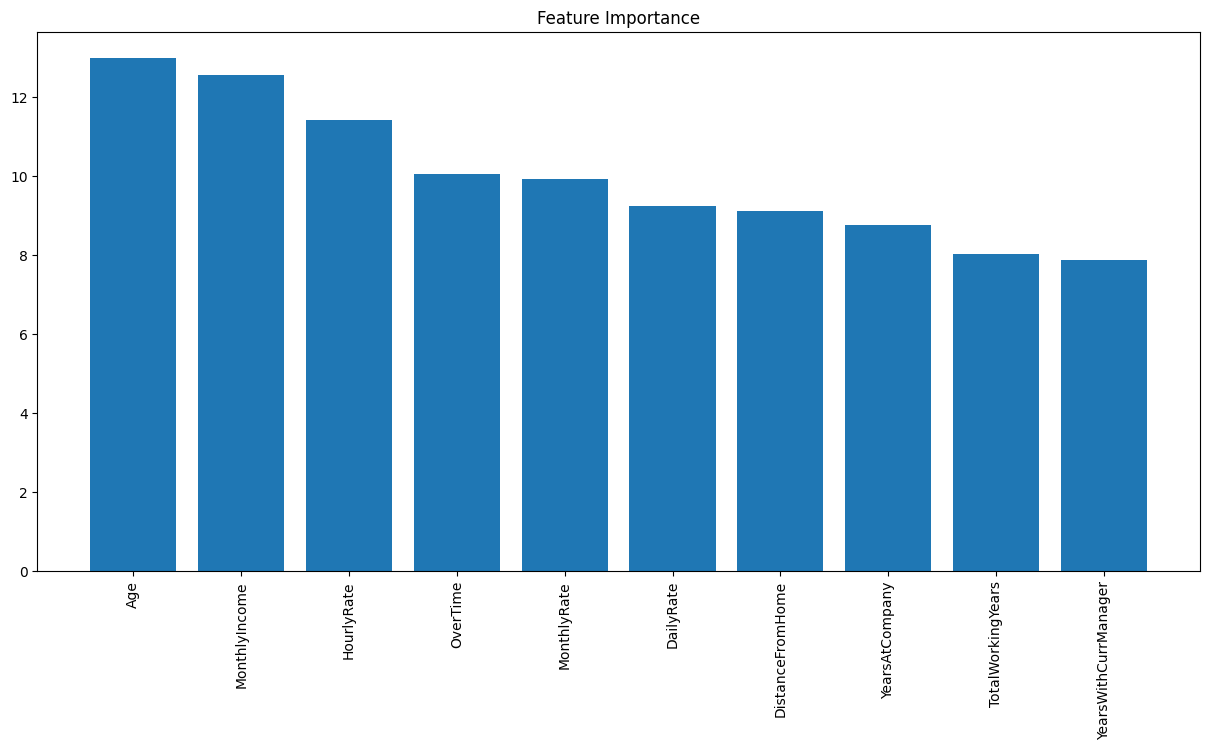

In [ ]:
importances = cb_clf.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

In [ ]:
importances = cb_clf.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(10):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

,Feature,Coefficient
0,Age,12.990613
1,MonthlyIncome,12.563726
2,HourlyRate,11.422229
3,OverTime,10.052393
4,MonthlyRate,9.939783
5,DailyRate,9.240311
6,DistanceFromHome,9.123197
7,YearsAtCompany,8.754204
8,TotalWorkingYears,8.024905
9,YearsWithCurrManager,7.888638
